In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.linalg as spla

from func import *
from math import log

## Background

After using [interpolation](https://jucaleb4.github.io/2018/12/31/Analying-Stocks-With-Scientific-Computing-Interpolation/) our stock data, we've managed to retrieve an interpolant that evaluates the value, first derivative, and second derivate within our domain (see graph below).

Looking at the stocks, we notice a pattern of moving up and down repeated. We further notice that looking at the first and second derivative that the values move up and down like the sine and cosine waves. Thus, we seek to use a tool called the Fast Fourier Transform, which is a variation of the Fourier transform that solves it in $O(nlogn)$ time.

Per definition, the Discrete-time Fourier transform is a form of Fourier anaysis, which "is the study of the way general functions may be represented or approximated by sums of simpler trigonometric functions" (per [wikipedia](https://en.wikipedia.org/wiki/Fourier_analysis))


Difference between the sum of the individual and the combined: 1.1235132086687285e-14


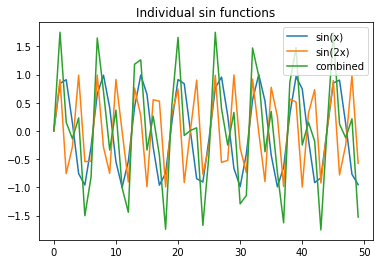

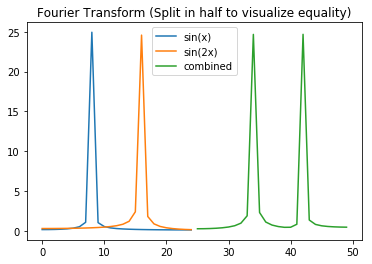

In [2]:
length = 50
x = np.arange(length)
v1 = np.sin(x)
v2 = np.sin(2*x)

plt.figure(1)
plt.plot(x,v1,label="sin(x)")
plt.plot(x,v2,label="sin(2x)")
plt.title("Individual sin functions")
v = v1 + v2
plt.plot(x,v,label="combined")
plt.legend()

v1fft = np.fft.fft(v1)
v2fft = np.fft.fft(v2)
vfft  = np.fft.fft(v)
plt.figure(2)
plt.title("Fourier Transform (Split in half to visualize equality)")
plt.plot(x[:length//2],abs(v1fft[:length//2]),label="sin(x)")
plt.plot(x[:length//2],abs(v2fft[:length//2]),label="sin(2x)")
plt.plot(x[length//2:],abs(vfft[length//2:]),label="combined")
plt.legend()

print("\nDifference between the sum of the individual and the combined: {}".format(la.norm(vfft - v2fft - v1fft)))

We see how even with the combined frequencies, we can extract the two original frequencies doing the Fourier transform.

## Motivation

Like the sine functions, we see to extract the different signals present in our original stock data, specifically with the derivative and second derivate. Getting this information can be quite usesful, as the first derivatives explain how the price will move in the near future, and the second derivative will explain whether or not the price will keep increasing or decrease.

We note in a perfect world, doing this analysis cannot reveal all the factors that affect the derivatives. The market is not a perfect, pendulum like world. Yet, the uncanniness of the sine and consine function to the data make it so we can extra *some* insights into how the market will move.

## What is the Fast Fourier Transform (FFT)?

To better understand FFT, we need to answer three questions:

1. What does the Fourier transform do? And why use it
1. What is the Discrete Fourier transform, and how does it work?
1. What is the difference between FFT and DFT
1. What is inverse FFT

### Fourier Transform
As explained above, Fourier transform converts a series of signals in a time domain to the frequency domain that builds the original signal up$^1$. This has many applications in signal processing (noise canceling headphones), image compression (remove noise in high frequency data), and light diffraction$^2$.

For noise canceling headphones, we hear our original music (what we want) and backgroud/outside noises (what we don't want). Many outside noises like plane engines, white noise, etc. have a constant noise frequency. With the Fourier transform, if we can find that constant frequency and cancel it by hitting the noise with the shifted frequency of it, we can effectively remove it from the audio spectrum.


### Discrete Fourier Transform
The DFT converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency$^3$.

In layman's terms, it helps us run the Fourier transform to any array of data points.

It is defined as a linear combination of

$$X_k = \sum_{n=1}^{N-1}x_n \cdot e^{-\frac{2\pi i}{N}kn}$$

where $X_k$ is our sequence of values in the frequency-domain and $N$ is the domain size. Note, we can solve this numerically with a Fourier matrix and input vector multiplication, where our Fourier matrix $F_N$ looks like:

$$\begin{bmatrix}
\omega_n^0 & \omega_n^0 & \omega_n^0 & \dots \\
\omega_n^0 & \omega_n^1 & \omega_n^2 & \ddots \\
\omega_n^0 & \omega_n^2 & \omega_n^3 & \vdots \\
\omega_n^0 & \omega_n^3 &    \ddots  & \ddots
\end{bmatrix}$$

where $w_n$ are called Twiddle factors defined by 

$$w_n = e^{-\frac{2\pi i}{N}}$$


### FFT vs DFT
Note that a matrix vector multiplication is $O(n^2)$ time. For large time based domains, this is undesirable, and life is bad. However, with some nice properties of the Fourier matrix, the DFT problem can be re-positioned to run in $O(nlogn)$ instead. For a size $n=1e6$, this is saving of 75000x.

The version (and most popular version) of FFT I was taught was the Cooley-Tukey FFT. I won't go into detail on how it works or the implemenation, but here is a wikipedia [link](https://en.wikipedia.org/wiki/Cooley–Tukey_FFT_algorithm) that explains it and also has psuedocode.

### Inverse FFT
Like DFT/FFT converts from time $\rightarrow$ frequency domain, inverse DFT/FFT let's us convert back to the time domain. We note this can be done with just the inverse of the Fourier matrix and can still be done in $O(nlogn)$ with slight adjustments to the FFT algorithm.

$^1$https://en.wikipedia.org/wiki/Fourier_transform <br />
$^2$http://www.thefouriertransform.com/applications/fourier.php <br />
$^3$https://en.wikipedia.org/wiki/Discrete_Fourier_transform

In [45]:
stock = "amzn" # AMZN, GOOG, GOOGL, ABBV, AMGN, NKE

stock = stock.upper()
ogp = getPrices(stock)[1]

In [46]:
length = len(ogp)

p = ogp[:length]

equaTime = np.arange(length)
coeff = continousSplineCoeff(p, equaTime)

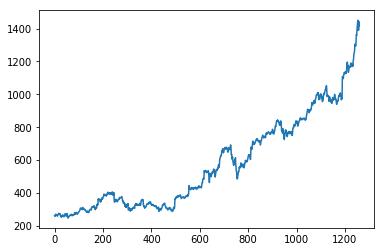

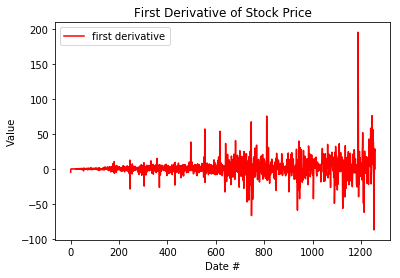

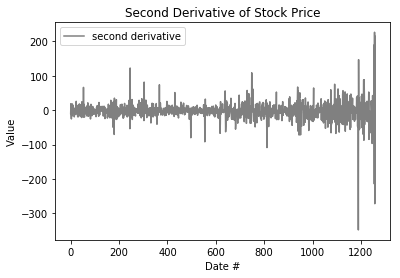

In [48]:
evalTime = np.linspace(0, length-1, length+1)
pts = evaulateCubicSpline(coeff, equaTime, evalTime, order=0)
plt.figure(5)
plt.plot(evalTime, pts)

plt.figure(6)
der1 = evaulateCubicSpline(coeff, equaTime, evalTime, order=1)
plt.title("First Derivative of Stock Price")
plt.plot(evalTime, der1, label="first derivative", color="red")
plt.xlabel("Date #")
plt.ylabel("Value")
plt.legend()

plt.figure(7)
plt.title("Second Derivative of Stock Price")
der2 = evaulateCubicSpline(coeff, equaTime, evalTime, order=2)
plt.plot(evalTime, der2, label="second derivative", color="grey")
plt.xlabel("Date #")
plt.ylabel("Value")
plt.legend()

Text(0.5, 1.0, 'Fourier Transform of Second Derivative')

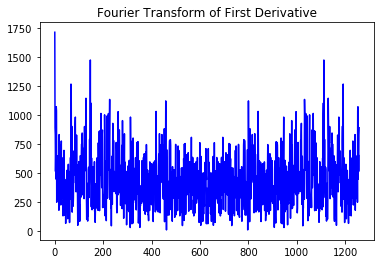

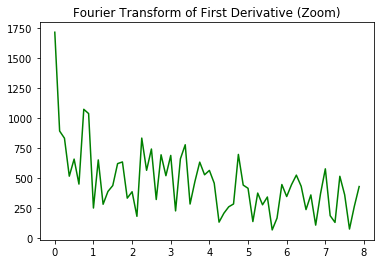

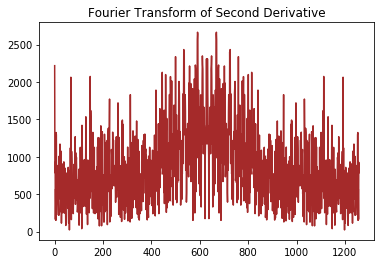

In [49]:
start = 0
end = len(der1)

plt.figure(3)
der1fft = np.fft.fft(der1)
plt.plot(evalTime, abs(der1fft[start:end]), color="blue")
plt.title("Fourier Transform of First Derivative")

plt.figure(4)
plt.plot(np.arange(0,64*1./steps,1./steps), abs(der1fft[:64]), color="green")
plt.title("Fourier Transform of First Derivative (Zoom)")

plt.figure(5)
der2fft = np.fft.fft(der2)
plt.plot(evalTime, abs(der2fft[start:end]), color="brown")
plt.title("Fourier Transform of Second Derivative")

## Extracting Different Frequencies

On paper, there are **a lot** of difference sources of frequencies. Looking at the zoomed in graph, we see that even the frequencies appear random. However, there are some tricks and generalizations we can apply to find the **big** frequencies only.

First, how do we extract the different frequencies? We will start by extracting our original frequencies in the first example of FFT with $sin(x)$ and $sin(2x)$. 

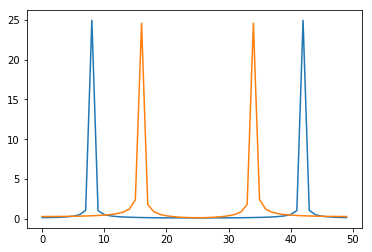

In [7]:
plt.figure(8)
plt.plot(x,abs(v1fft))
plt.plot(x,abs(v2fft))
# plt.plot(x,abs(vfft))

By hand, we notice the four peaks.

Eyeballing it, let's extract and separate the frequency-based data of the the peaks. For now, we will ignore the right half since those pertain to the imaginary numbers which is usually are usually mirrored$^4$. Once we have it, we can run inverse FFT, which will help us convert our frequency-domain back to our time-domain, or sin() functions. Yes, it will be crude approximation, but it should be good, since we just care about frequencies.

$^4$https://dsp.stackexchange.com/questions/4825/why-is-the-fft-mirrored

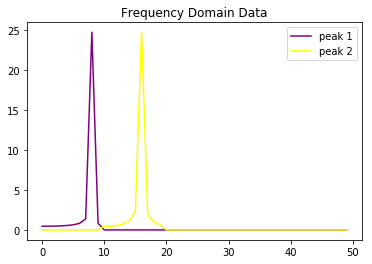

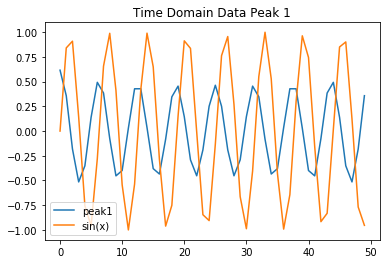

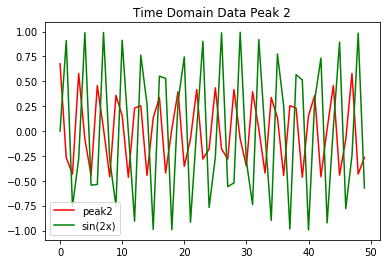

In [8]:
vExtract1 = np.zeros(len(v),dtype=np.complex)
vExtract2 = np.zeros(len(v),dtype=np.complex)

vExtract1[0:10] = abs(vfft)[:10]
vExtract2[10:20] = abs(vfft)[10:20]

plt.figure(9)
plt.plot(x,abs(vExtract1),label="peak 1",color="purple")
plt.plot(x,abs(vExtract2),label="peak 2",color="yellow")
plt.title("Frequency Domain Data")
plt.legend()

vInv1 = np.fft.ifft(vExtract1)
vInv2 = np.fft.ifft(vExtract2)

plt.figure(10)
plt.plot(x,vInv1.real,label="peak1")
plt.plot(x,v1,label="sin(x)")
plt.title("Time Domain Data Peak 1")
plt.legend()

plt.figure(11)
plt.plot(x,vInv2.real,label="peak2",color="red")
plt.plot(x,v2,label="sin(2x)",color="green")
plt.title("Time Domain Data Peak 2")
plt.legend()

## Numerically Extract Peaks

Fantastic! We found a way to (roughly) extract the frequencies from our small problem. While eye-balling the peaks is a useful tool, it doesn't help us extract the peaks from our stocks. In particular, we still face these problems:

1. There are >>> 2 peaks 
1. With so many frequency peaks, a majority could just be noise (useless data)
1. If we want to automate this process, eye-balling it is not a good way to scale

To solve all these problems, we will re-use interpolation to develop a technique to extract the main peaks numerically. These will help us get a "big-picture" view of our data. To do this, we will:

1. We will interpolate only the local maximums/minumums to get a smooth interpolant
1. Once have the maxs and mins, we want way to extract those peaks
1. Run FFT to find the different frequencies

In [93]:
coeff1 = continousSplineCoeff(der1fft, evalTime)
print("part 1 done")
coeff2 = continousSplineCoeff(der2fft, evalTime)
print("part 2 done")

part 1 done
part 2 done


### Interpolate Local Max/Mins

To do this, we will only save points (and their respective times) when their first derivative is 0 ( we will supply a threshold here since approaching 0 numerically might be hard ). 

To find those minimums and maximums, we need to basically brute force (try many equaspaced points) and check the derivative. The more points, the more accurate. However, the more points, the longer the run time.

We can devise a hueristic to solve this with (near) infinite accuracy while reducing the run time.

What we know with our interpolants is that we have a cubic polynomial for a certain domain. Rather than brute force, we can numerically solve it by find the derivative of the polynomial at that point and seeing if the roots lie within the domain it is assigned

## Finding Rootings

Finding roots is its own branch of scientific computing. There are two methods to solve this:

1. Numerically solve with optimization techniques
1. Using a library like Sympy

Either version will be fine. Here, we wil approach it as an optimization problem since this is a scientfic computing series.

### Optimization Techniques

Some 1-D optimization, which are problems concering critical point finding, techniques that come to mind are:

1. Golden
1. Newton

When implementing these, since we are findig roots (solving for $x \in [start,end]$ where $f'(x) = 0$), which luckily we can find pretty easily since they are all cubic polynomials.

We will not go into depth the technique for this. We will just showcase the answers. However, the technique will be explained and implemented in the next notebook!

In [94]:
ogSize = len(coeff1)//4

tol1 = 1e-8
tol2 = 1e-8

maxOnly = False

if maxOnly:
    t1,v1 = findCP(coeff1,evalTime,tol1,localMaxOnly=True)
else:
    t1,v1 = findCP(coeff1,evalTime,tol1)
print("{} domains with no critical point, found {}".format(ogSize-len(t1), len(t1)))

if maxOnly:
    t2,v2 = findCP(coeff2,evalTime,tol2,localMaxOnly=True)
else:
    t2,v2 = findCP(coeff2,evalTime,tol2)
print("{} domains with no critical point, found {}".format(ogSize-len(t2), len(t2)))

# removes value on the right hand side
t1,v1 = removeImg(t1,v1,length//2)
t2,v2 = removeImg(t2,v2,length//2)

Exitted domain 657 of the 1260 times
1154 domains with no critical point, found 105
Exitted domain 679 of the 1260 times
1151 domains with no critical point, found 108


### Plotting Mins and Maxs

Now we have a rough estimate of a cleaner version of the peaks using our optimization technique. Let's see what it looks like!

Text(0.5, 1.0, 'FFT of second derivative')

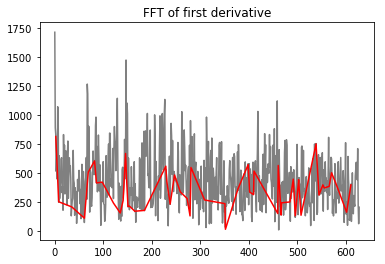

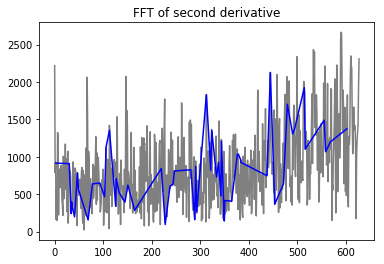

In [86]:
plt.figure(12)
plt.plot(evalTime[:length//2], abs(der1fft)[:length//2], color="grey")

plt.plot(t1, abs(v1),color="red")
plt.title("FFT of first derivative")

plt.figure(13)
plt.plot(evalTime[:length//2], abs(der2fft)[:length//2], color="grey")

plt.plot(t2, abs(v2),color="blue")
plt.title("FFT of second derivative")

### Finding and Extracting the Peaks

So yeah, this is a **very** rough estimate, but it does a good job approximating. It would be interesting to see how accurate this could get as we decreased/increased the tolerance. But for now, we need a method to extract the peaks. And it's not very straight forward.

#### Solution 1: Finding the highest points
Since are looking for peaks, we could just look for the highest points. But that presents a lot of troubles. In our given graph, we have a cluster of high points near the beginning. That would severely skew the data. We could also go through each region and try to find the peak. However, we don't know if a region will contain one of those said peeks. And how do we justify if one peak is "enough" over another?


#### Solution 2: Neighborhood search
This could help us find the peaks within each neighborhood region. However, this still brings up a question of how much is "enough"? Remember, our graph is filled with lots of peaks. There is bound to be peaks that are higher than their neighbors. While this would be a good idea, it would be hard to automate since each "peak" is relatively higher.

#### Solution 3: Assign (first and second) derivative scoring
We could approach this as which points are climbing the highest and then falling the fastest, or which has the highest first derivative in conjunction with the lowest second derivative. The intuition here is that maximums require two values to be true:
1. $f' > 0$
1. $f'' < 0$

If we find the points where we maximize these two, this could help us crudely approximate those peaks. We will create a simple ranking system and find the combined score of the first and second derivate to rank these peaks. To run this, we will devise a sorting algorithm that sorts the actual values along with their indicies. That way, we can see the ranking w.r.t the indicies.

We will run merge sort to have a guaranteed $O(nlogn)$

In [131]:
def removeNonMax(d1, d2,t):
    assert(len(d1) == len(d2) == len(t))
    
    maxd1 = np.zeros(0); maxd2 = np.zeros(0)
    idxHold = np.zeros(0);
    for i in range(len(d1)):
        if d1[i] > 0 and d2[i] < 0:
            maxd1 = np.append(maxd1, d1[i])
            maxd2 = np.append(maxd2, d2[i])
            idxHold = np.append(idxHold, t[i])
            
    return [maxd1,maxd2,idxHold]

In [132]:
fft1Der1 = evaulateCubicSpline(coeff1, evalTime, t1, order=1)
fft1Der2 = evaulateCubicSpline(coeff1, evalTime, t1, order=2)

fft1Der1,fft1Der2,oldIdx = removeNonMax(fft1Der1,fft1Der2,t1)

arrsize = len(fft1Der1)
print("items left: {}".format(arrsize))

fft1Der1Idx = np.arange(1,arrsize+1)
fft1Der2Idx = np.arange(1,arrsize+1)

# -1 so the largest numbers go first
mergeSort(fft1Der1.copy().real*-1, fft1Der1Idx, 0, arrsize)
mergeSort(fft1Der2.copy().real, fft1Der2Idx, 0, arrsize)

items left: 15


In [133]:
def rankingProfile(val):
    a = val[0]; b = val[1]
    return (a**2 + b**2)**.5

def rankSort(idx1, idx2, rankingFunc):
    arrsize = len(idx1)
    rankingTuples = np.array([(0,0) for i in range(arrsize)])

    for i in range(arrsize):
        rankingTuples[i][0] = idx1[i]
        rankingTuples[i][1] = idx2[i]

    rankings = np.zeros(arrsize)
    for i in range(arrsize):
        rankings[i] = rankingFunc(rankingTuples[i])

    rankingIdx = np.arange(arrsize)
    mergeSort(rankings, rankingIdx, 0, arrsize)
    return rankingIdx
    # return np.asarray([rankingTuples[i] for i in rankingIdx])

In [134]:
fft1Ranking = rankSort(fft1Der1Idx,fft1Der2Idx,rankingProfile)

for i in fft1Ranking:
    print(oldIdx[i])
    # print("d1: {}, d2: {}".format(fft1Der1[i], fft1Der2[i]))

308.7927576606411
237.81504740011937
8.057448291451253
164.92209940012273
280.8418754995659
460.668167291057
507.64330058536126
552.6451613641967
184.87232806109813
150.8862093397482
145.9445207405572
409.7449299913819
502.62268847679206
35.01717216603429
502.60047656260673


### Cluster Point Separation

As we can see, the ranking system is still quite clustered. Lots of values below 30. Instead, we should combine our strategy 2, or neighborhood search, with our implementation. We can define a radius region (can be arbitrarily, can be 10% of the total length) and then only provide one value per radius region. Let's see how it goes.

For now, let's look for 5 peaks. We will go through and their their x-coordinates, and then use those x-coordinates to get the values at those times.

In [60]:
def getUniqueRadiusPoints(rankings, radiusSize, mem, limit=5):
    values = np.zeros(0)
    ct = 0
    for idx in rankings:
        zone = idx//radiusSize
        if zone not in mem:
            mem[zone] = True
            values = np.append(values, idx)
            ct += 1
        if ct >= limit:
            break
    return values

[18.5]


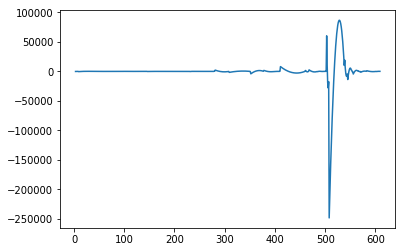

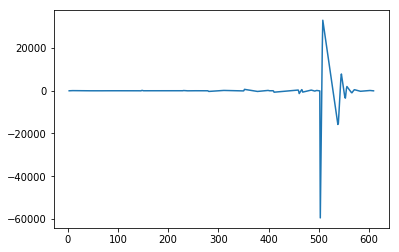

In [61]:
radius = length//10
mem = {}
values = []
limit = 5

uniqueValues = getUniqueRadiusPoints(fft1RankingsIdx/steps, radius, mem, limit)

print(uniqueValues)

plt.figure(15)
plt.plot(smallApproxEquaTime1, fft1Der1)
plt.figure(16)
plt.plot(smallApproxEquaTime1, fft1Der2)

### Running inverse FFT to extract Time Series

In [ ]:
# approxCoeff1 = continousSplineCoeff(abs(v1), t1)
# approxCoeff2 = continousSplineCoeff(abs(v2), t2)

# smallApproxEquaTime1 = np.linspace(int(t1[0])+1, int(t1[-1])-1, int(t1[-1] - t1[0] - 1))
# smallApproxEquaTime2 = np.linspace(int(t2[0])+1, int(t2[-1])-1, int(t2[-1] - t2[0] - 1))

# print("Original time hop: {}".format(evalTime[1] - evalTime[0]))
# print()
# print("Max time hop in t1: {}".format(max([abs(t1[i]-t1[i+1]) for i in range(len(t1)-1)])))
# print("Max time hop in t2: {}".format(max([abs(t2[i]-t2[i+1]) for i in range(len(t2)-1)])))
# print()
# print("Avg time hop in t1: {}".format((t1[-1]-t1[0])/len(t1)))
# print("Avg time hop in t2: {}".format((t2[-2]-t2[0])/len(t2)))

# n1 = len(t1)
# n2 = len(t2)

# plt.figure(12)
# approxVal1 = evaulateCubicSpline(approxCoeff1, t1, smallApproxEquaTime1)
# plt.title("First Derivative of Stock Price")
# plt.plot(smallApproxEquaTime1, abs(approxVal1), label="approx first derivative", color="black")
# plt.xlabel("Date #")
# plt.ylabel("Value")
# plt.legend()

# plt.figure(13)
# plt.plot(t1, abs(v1))
# plt.title("Max and Mins of FFT of first derivative", color="blue")

# plt.figure(14)
# plt.title("Second Derivative of Stock Price")
# approxVal2 = evaulateCubicSpline(approxCoeff2, t2, smallApproxEquaTime2)
# plt.plot(smallApproxEquaTime2, abs(approxVal2), label="approx second derivative", color="black")
# plt.xlabel("Date #")
# plt.ylabel("Value")
# plt.legend()

# plt.figure(15)
# plt.title("Max and Mins of FFT of second derivative")
# plt.plot(t2, abs(v2),color="blue")